In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

In [2]:
corr = 0.25

In [3]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"

# Load DQN results

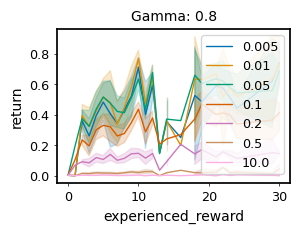

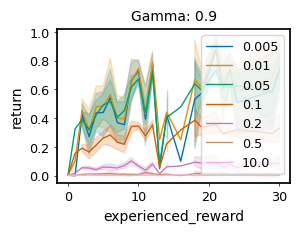

In [4]:
for gamma in [0.7, 0.8, 0.9]:
    model_name = f"dqn_nlayers4_gamma{gamma}_target10_lr1e-05"
    path_to_pkl = os.path.join(engram_dir, wandb_project, env_name, "models", model_name, "eval_results.pkl")
    try:
        with open(path_to_pkl, "rb") as f:
            data = pickle.load(f)
    except:
        continue
    dqn_df = pd.DataFrame(data)
    dqn_df = dqn_df.rename(columns={'returns': 'return'})
    dqn_df['model'] = 'DQN'
    dqn_df['path_length_scaled'] = 1 - dqn_df['return']

    fig, ax = plt.subplots(figsize=(3,2))
    for action_temp in np.unique(dqn_df['action_temps']):
        sns.lineplot(
            x='experienced_reward', y='return',
            data=dqn_df[dqn_df['action_temps']==action_temp],
            ax=ax,
            label=action_temp
            )
    plt.title(f'Gamma: {gamma}')

# Load Q-Table results

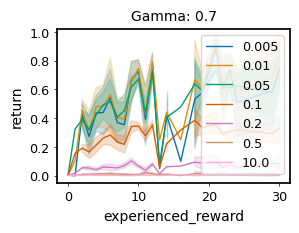

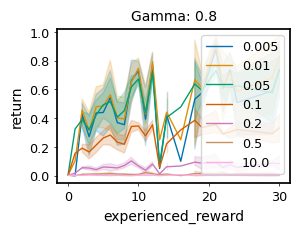

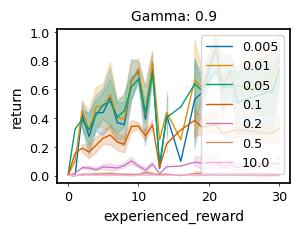

In [5]:
for gamma in [0.7, 0.8, 0.9]:
    model_name = f"q_table_gamma{gamma}"
    path_to_pkl = os.path.join(engram_dir, wandb_project, env_name, "models", model_name, "eval_results.pkl")
    with open(path_to_pkl, "rb") as f:
        data = pickle.load(f)
    qtable_df = pd.DataFrame(data)
    qtable_df = qtable_df.rename(columns={'returns': 'return'})
    qtable_df['model'] = 'Q Table'
    qtable_df['path_length_scaled'] = 1 - qtable_df['return']
    qtable_df.head()
    
    fig, ax = plt.subplots(figsize=(3,2))
    for action_temp in np.unique(dqn_df['action_temps']):
        sns.lineplot(
            x='experienced_reward', y='return',
            data=dqn_df[dqn_df['action_temps']==action_temp],
            ax=ax,
            label=action_temp
            )
    plt.title(f'Gamma: {gamma}')
